[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juaryR/treinamento-h2ai/blob/main/PreRequisitos.ipynb)

# Data structures

Data structures are the fundamental constructs around which you build your programs.



##  Dictionaries

### Dict

In [ ]:
phonebook  = {
    "bob": 7387,
    "alice":3719,
    "jack": 7052,
}
squares = {x: x*x for x in range(6)}

In [ ]:
phonebook['alice']

3719

In [ ]:
squares

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16, 5: 25}

Python’s dictionaries are indexed by keys that can be of any hashable type. A hashable object has a hash value that never changes during its lifetime (see __hash__), and it can be compared to other objects (see __eq__). Hashable objects that compare as equal must have the same hash value.

### Collections

#### OrderedDict 

Python includes a specialized dict subclass that remembers the insertion order of keys added to it: collections.OrderedDict.

In [ ]:
from collections import OrderedDict
d = OrderedDict(one=1, two=2, three=3) 
d

OrderedDict([('one', 1), ('two', 2), ('three', 3)])

In [ ]:
d["four"] = 4
d

OrderedDict([('one', 1), ('two', 2), ('three', 3), ('four', 4)])

In [ ]:
d.keys()

odict_keys(['one', 'two', 'three', 'four'])

#### defauldict

The defaultdict class is another dictionary subclass that accepts a callable in its constructor whose return value will be used if a requested key cannot be found.

In [ ]:
from collections import defaultdict
dd = defaultdict(list)
# Accessing a missing key creates it and
# initializes it using the default factory,
# i.e. list() in this example:
dd["dogs"].append("Rufus")
dd["dogs"].append("Kathrin")
dd["dogs"].append("Mr Sniffles")
dd["dogs"]

['Rufus', 'Kathrin', 'Mr Sniffles']

#### ChainMap  

The collections.ChainMap data structure groups multiple dictionaries into a single mapping. Lookups search the underlying mappings one by one until a key is found. 

In [ ]:
from collections import ChainMap
dict1 = {"one": 1, "two": 2}
dict2 = {"three": 3, "four": 4}
chain = ChainMap(dict1, dict2)
print(chain)
# ChainMap searches each collection in the chain
# from left to right until it finds the key (or fails):
print(chain["three"])
print(chain["one"])
print(chain["missing"])

ChainMap({'one': 1, 'two': 2}, {'three': 3, 'four': 4})
3
1


KeyError: ignored

## types

### MappingProxyType

In [ ]:
from types import MappingProxyType
writable = {"one": 1, "two": 2}
read_only = MappingProxyType(writable)
# The proxy is read-only:
print(read_only["one"])
read_only["one"] = 23


1


TypeError: ignored

In [ ]:
# Updates to the original are reflected in the proxy:
writable["one"] = 42
read_only

mappingproxy({'one': 42, 'two': 2})

### Dictionaries in Python: Summary

All the Python dictionary implementations listed in this tutorial are valid implementations that are built into the Python standard library.

If you’re looking for a general recommendation on which mapping type to use in your programs, I’d point you to the built-in dict data type. It’s a versatile and optimized hash table implementation that’s built directly into the core language.

## Array Data Structures

### array

Python’s array module provides space-efficient storage of basic C-style data types like bytes, 32-bit integers, floating-point numbers, and so on.

In [ ]:
import array
arr = array.array("f", (1.0, 1.5, 2.0, 2.5))
print(arr[1])
# Arrays have a nice repr:
print(arr)
# Arrays are mutable:
arr[1] = 23.0
print(arr)
del arr[1]
print(arr)
arr.append(42.0)
print(arr)
# Arrays are "typed":
arr[1] = "hello"

1.5
array('f', [1.0, 1.5, 2.0, 2.5])
array('f', [1.0, 23.0, 2.0, 2.5])
array('f', [1.0, 2.0, 2.5])
array('f', [1.0, 2.0, 2.5, 42.0])


TypeError: ignored

## Scientific Python 

In [ ]:
!wget https://raw.githubusercontent.com/IanHawke/maths-with-python/master/southampton_precip.txt

--2022-04-11 18:16:52--  https://raw.githubusercontent.com/IanHawke/maths-with-python/master/southampton_precip.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9773 (9.5K) [text/plain]
Saving to: ‘southampton_precip.txt’

southampton_precip. 100%[===================>]   9.54K  --.-KB/s    in 0s      

2022-04-11 18:16:52 (64.2 MB/s) - ‘southampton_precip.txt’ saved [9773/9773]



In [ ]:
!head /content/southampton_precip.txt

#Year Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
1855 85.6 54.3 61.3 10.1 60.0 43.9 101.0 47.9 88.4 187.5 28.2 55.4
1856 93.5 50.6 36.3 127.3 55.7 40.3 16.5 64.7 67.6 74.5 38.7 87.1
1857 72.3 10.6 54.4 60.7 19.0 38.2 43.7 66.3 93.6 191.4 57.1 25.0
1858 27.0 33.1 22.9 94.1 65.7 14.1 69.6 55.5 75.2 66.2 50.1 116.6
1859 59.6 78.3 49.7 92.4 36.8 45.7 66.6 58.3 135.3 119.8 125.1 127.1
1860 129.2 29.3 59.3 47.6 88.7 205.0 84.7 115.0 99.2 53.2 80.2 127.7
1861 20.7 60.2 76.4 10.2 41.3 100.8 103.5 22.2 78.0 27.7 164.3 53.2
1862 104.0 20.1 124.2 57.5 123.9 53.8 52.8 36.3 29.7 171.8 22.4 72.7
1863 129.4 32.4 38.7 20.5 55.2 94.6 26.4 63.9 98.7 115.3 60.7 64.4


In [ ]:
import numpy 

In [ ]:
data = numpy.loadtxt('southampton_precip.txt')

In [ ]:
data


In [ ]:
years = data[:, 0]

In [ ]:
rainfall = data[:, 1:]

In [ ]:
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize']=(12,9)

In [ ]:
from matplotlib import pyplot

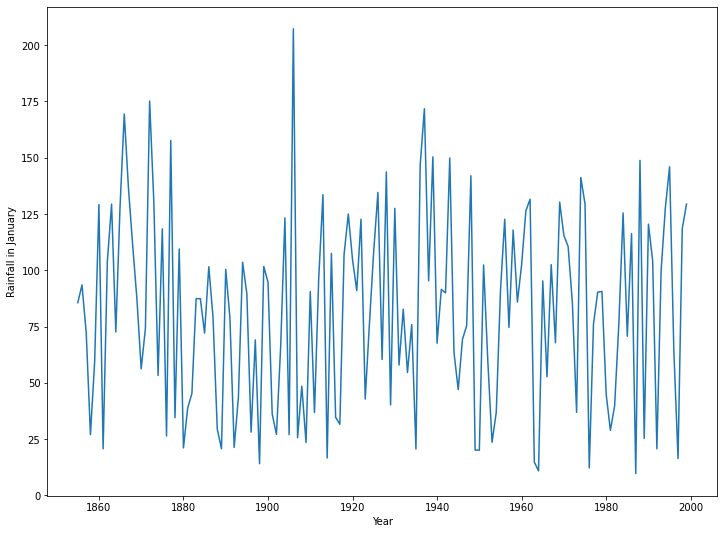

In [ ]:
pyplot.plot(years, rainfall[:,0])
pyplot.xlabel('Year')
pyplot.ylabel('Rainfall in January');

### Basic statistical functions

basic statistical functions, such  min, max and mean

In [ ]:
print("Minimum rainfall: {}".format(rainfall.min()))
print("Maximum rainfall: {}".format(rainfall.max()))
print("Mean rainfall: {}".format(rainfall.mean()))

Minimum rainfall: 0.0
Maximum rainfall: 280.7
Mean rainfall: 67.03591954022988


mean rainfall in the first year, 1855.

In [ ]:
print ("Mean rainfall in 1855: {}".format(rainfall[0, :].mean()))

Mean rainfall in 1855: 68.63333333333334


mean rainfall in January

In [ ]:
print ("Mean rainfall in January: {}".format(rainfall[:, 0].mean()))

Mean rainfall in January: 81.86482758620689


numpy allows us to apply a function along an axis of the array

In [ ]:
mean_rainfall_in_month = rainfall.mean(axis=0)
mean_rainfall_per_year = rainfall.mean(axis=1)

plot how the mean 

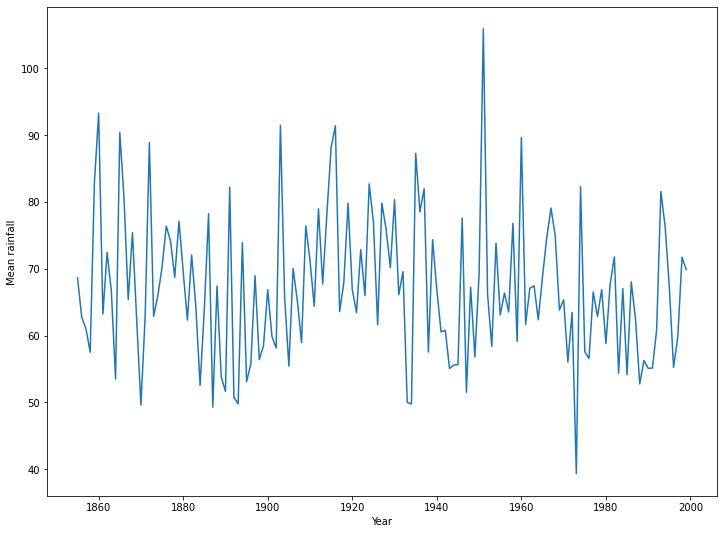

In [ ]:
pyplot.plot(years, mean_rainfall_per_year)
pyplot.xlabel('Year')
pyplot.ylabel('Mean rainfall');

## Numpy 

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. 

### Arrays 

In [ ]:
import numpy as np
a = np.array([1, 2, 3])   
print(type(a))            
print(a.shape)            
print(a[0], a[1], a[2])   
a[0] = 5                  
print(a)                  


<class 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]


In [ ]:
b = np.array([[1,2,3],[4,5,6]])
print(b.shape)                 
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


####  functions to create array

In [ ]:
import numpy as np

a = np.zeros((2,2))   
print(a)              
                     

b = np.ones((1,2))    
print(b)              

c = np.full((2,2), 7)  
print(c)              
                       
d = np.eye(2)         
print(d)             
                     

e = np.random.random((2,2))  
print(e)                    

[[0. 0.]
 [0. 0.]]
[[1. 1.]]
[[7 7]
 [7 7]]
[[1. 0.]
 [0. 1.]]
[[0.01495198 0.80564447]
 [0.61820876 0.17048403]]


### Datatypes 

 Numpy provides a large set of numeric datatypes that you can use to construct arrays.

In [1]:
import numpy as np
x = np.array([1, 2])
print(x.dtype) 

x = np.array([1.0, 2.0])
print(x.dtype)  
# Force a particular datatype
x = np.array([1, 2], dtype=np.int64) 
print(x.dtype) 
## all about numpy datatypes
## https://numpy.org/doc/stable/reference/arrays.dtypes.html 

int64
float64
int64


### Array math 

In [3]:
import numpy as np

x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)
print('Elementwise sum; both produce the array')
print(x + y)
print(np.add(x, y))
print('----------------------------------------')
print('Elementwise difference; both produce the array')
print(x - y)
print(np.subtract(x, y))
print('----------------------------------------')
print('Elementwise product; both produce the array')
print(x * y)
print(np.multiply(x, y))
print('----------------------------------------')
print('Elementwise division; both produce the array')
print(x / y)
print(np.divide(x, y))

print('Elementwise square root')
print(np.sqrt(x))


Elementwise sum; both produce the array
[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]
----------------------------------------
Elementwise difference; both produce the array
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
----------------------------------------
Elementwise product; both produce the array
[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]
----------------------------------------
Elementwise division; both produce the array
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
Elementwise square root
[[1.         1.41421356]
 [1.73205081 2.        ]]


'*' is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices.

In [4]:
import numpy as np

x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))


219
219
[29 67]
[29 67]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


transpose a matrix, simply use the T attribute of an array object:

In [5]:
import numpy as np

x = np.array([[1,2], [3,4]])
print(x)    # Prints "[[1 2]
            #          [3 4]]"
print(x.T)  # Prints "[[1 3]
            #          [2 4]]"

# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print(v)    # Prints "[1 2 3]"
print(v.T)  # Prints "[1 2 3]"

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[1 2 3]
[1 2 3]


## Referencia
[Common Python Data Structures](https://realpython.com/python-data-structures/)

[Maths With Python](https://buildmedia.readthedocs.org/media/pdf/maths-with-python/latest/maths-with-python.pdf)

[Python Numpy Tutorial](https://cs231n.github.io/python-numpy-tutorial/)